## Title - Analysis of Cancellation Rates & Service Availability


## Problem Statement
This project focuses on analyzing the factors influencing cancellation requests for home fibre services. Utilizing data from the **Home Fibre Cancellation Report** and the **Home Fibre Demand List Mapping**, we aim to uncover insights into customer behavior and preferences regarding service cancellations. By examining key features such as cancellation status, service address, and operator services, this analysis will provide a deeper understanding of the underlying factor of cancellations. The ultimate goal is to inform strategies that enhance service offerings and reduce customer attrition.


## Objectives

1. Analyze the relationship between different operators and the aging days of cancellation requests.

2. Examine how operator performance correlates with the number of customers who changed their minds about cancellations.

3. Investigate the relationship between service demand and geographical state to identify trends in customer requests.


## Data: Home Fibre Cancellation Analysis

### 1. Home Fibre Cancellation Report
- **Source**: Home Fibre Cancellation Report.
- **Key Features**:
  - **subStatus**: Current status of the cancellation.
  - **cancelComments**: Comments regarding the cancellation (provides context).
  - **created**: Date and time of creation (helps track the timeline).
  - **Aging Days**: Number of days since cancellation (indicates urgency).
  - **operator**: Operator coverage port (important for performance analysis).

### 2. Home Fibre Demand List Mapping
- **Source**: Home Fibre Demand List Mapping.
- **Key Features**:

  - **Aging Days**: Duration taken for processing order (finding relation).
  - **Created Date**: Date and time of creation (important for tracking requests).
  - **operator**: Operator handling the demand (important for accountability).
  - **Service Address**: Address for service provision (necessary for categorization by state).





#### 1. **Project Objectives**

#### 2. **Data Sources**
   - **Home Fibre Cancellation Report**: Contains detailed records of cancellation requests, including statuses, comments, and timestamps.
   - **Home Fibre Demand List Mapping**: Includes customer information, service addresses, and demand statuses, which can provide context for cancellations.


#### 3. **Data Exploration**
   - Load the data from the CSV files:
     - Utilize Pandas to read the datasets and explore their structures.
     - Examine data types, summary statistics, and distribution of key variables.

#### 4. **Data Cleaning**
   - Address missing values by employing techniques such as imputation or removal, depending on the context.
   - Remove duplicate entries to ensure data integrity.
   - Standardize column names across datasets for consistency.
   - Convert relevant columns (e.g., dates) to appropriate formats for seamless analysis.


#### 5. **Data Analysis & Visualization**
   - Perform exploratory data analysis (EDA) and visualization:
     - Analyze cancellation rates across different channels and operators to identify trends.
     - Review cancellation comments to extract common themes and sentiments.
     - Investigate correlations between aging days and cancellation reasons to identify potential service issues.
     - Segment analysis by geographical location based on service address to uncover regional trends.

#### 6. **Insights and Recommendations**
   - Summarize key findings from the analysis, highlighting significant patterns and correlations.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

### **Retrieve Data from Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
foldername = "/content/drive/MyDrive/Capstone"
filename1 = foldername+"/Home Fibre _Demand List Mapping_Table.csv"
data2 = pd.read_csv(filename1)

In [ ]:
filename2 = foldername+ "/Home Fibre _Cancellation Report_Table.csv"
data = pd.read_csv(filename2)

### **Data Description**

In [ ]:
print(f"Demand record: {data2.shape[0]} rows, {data2.shape[1]} columns")
print(f"Cancellation record: {data.shape[0]} rows, {data.shape[1]} columns")

Demand record: 1003 rows, 14 columns
Cancellation record: 32123 rows, 17 columns


In [ ]:
data.columns

Index(['Channel (Dashboard)', 'createdBy', 'storeId', 'created', 'subStatus',
       'cancelComments', 'cancelledAppointmentClickedUtc', 'Aging Days',
       'Session Link', 'operator', 'status', 'fullname', 'phone',
       'partner_service_order_id', 'partnerTransferRequestId', 'flagMsgTag',
       'flagMsg'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32123 entries, 0 to 32122
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Channel (Dashboard)             32123 non-null  object
 1   createdBy                       32123 non-null  object
 2   storeId                         31372 non-null  object
 3   created                         32123 non-null  object
 4   subStatus                       29562 non-null  object
 5   cancelComments                  32115 non-null  object
 6   cancelledAppointmentClickedUtc  28748 non-null  object
 7   Aging Days                      32123 non-null  int64 
 8   Session Link                    32123 non-null  object
 9   operator                        32122 non-null  object
 10  status                          32123 non-null  object
 11  fullname                        32123 non-null  object
 12  phone                           32123 non-null

In [ ]:
data.select_dtypes(include = ["number"]).dtypes

,0
Aging Days,int64
phone,int64


In [ ]:
data2.columns

Index(['Reference ID', 'Customer Name', 'MSISDN', 'HSBB Status', 'operator',
       'Ticket ID', 'plan', 'Service Address', 'Status', 'Created Date',
       'Created By', 'Aging', 'VASP', 'celcomInstallationStatus'],
      dtype='object')

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Reference ID              1003 non-null   int64  
 1   Customer Name             443 non-null    object 
 2   MSISDN                    443 non-null    float64
 3   HSBB Status               443 non-null    object 
 4   operator                  442 non-null    object 
 5   Ticket ID                 942 non-null    object 
 6   plan                      442 non-null    object 
 7   Service Address           1003 non-null   object 
 8   Status                    1003 non-null   object 
 9   Created Date              1003 non-null   object 
 10  Created By                1003 non-null   object 
 11  Aging                     1001 non-null   float64
 12  VASP                      1003 non-null   object 
 13  celcomInstallationStatus  165 non-null    object 
dtypes: float

In [ ]:
data2.select_dtypes(include = ["number"]).dtypes

,0
Reference ID,int64
MSISDN,float64
Aging,float64


### **Data Cleaning** - Cancellation Dataset

In [ ]:
data.drop(['Channel (Dashboard)','createdBy','fullname','storeId','cancelledAppointmentClickedUtc', 'Session Link','partner_service_order_id','partnerTransferRequestId', 'flagMsg','phone','status','cancelComments', 'flagMsgTag'] ,axis=1, inplace=True)

In [ ]:
data

,created,subStatus,Aging Days,operator
0,"Oct 10, 2024, 10:28:06 PM",Submitted in Error,2,TM
1,"Oct 10, 2024, 9:24:13 PM",Customer changed mind,2,CD
2,"Oct 10, 2024, 9:08:47 PM",Insufficient Info - Address,2,TM
3,"Oct 10, 2024, 8:18:56 PM",Customer changed mind,2,TM
4,"Oct 10, 2024, 6:48:02 PM",Submitted in Error,2,TM
...,...,...,...,...
32118,"Jan 1, 2024, 10:58:09 AM",Customer no longer reachable,285,TM
32119,"Jan 1, 2024, 10:43:17 AM",Customer changed mind,285,TM
32120,"Jan 1, 2024, 10:37:20 AM",Submitted in Error,285,TDC
32121,"Jan 1, 2024, 10:28:08 AM",Insufficient Info - Address,285,TM


In [ ]:
data['created'].dtypes

dtype('O')

In [ ]:
data['created'] = pd.to_datetime(data['created'])
data['Month'] = data['created'].dt.strftime('%B')
data['created'] = data['created'].dt.strftime('%d/%m/%Y')
data

<ipython-input-332-05d5e4e1cece>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['created'] = pd.to_datetime(data['created'])


,created,subStatus,Aging Days,operator,Month
0,10/10/2024,Submitted in Error,2,TM,October
1,10/10/2024,Customer changed mind,2,CD,October
2,10/10/2024,Insufficient Info - Address,2,TM,October
3,10/10/2024,Customer changed mind,2,TM,October
4,10/10/2024,Submitted in Error,2,TM,October
...,...,...,...,...,...
32118,01/01/2024,Customer no longer reachable,285,TM,January
32119,01/01/2024,Customer changed mind,285,TM,January
32120,01/01/2024,Submitted in Error,285,TDC,January
32121,01/01/2024,Insufficient Info - Address,285,TM,January


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.groupby(['operator']).size()

,0
operator,
ALLO,15
CD,4
CTS,673
CTSB,28
OB,122
SACOFA,16
TDC,1979
TIME,53
TM,26127


In [ ]:
def true_operator(i):
  return 'TNB-ALLO' if i == 'ALLO' else 'CD' if i == 'OB' else 'CTS' if i == 'CTSB' else 'TIME' if i == 'TDC' else i

data['operator'] = data['operator'].apply(true_operator)

data

,created,subStatus,Aging Days,operator,Month
0,10/10/2024,Submitted in Error,2,TM,October
1,10/10/2024,Customer changed mind,2,CD,October
2,10/10/2024,Insufficient Info - Address,2,TM,October
3,10/10/2024,Customer changed mind,2,TM,October
4,10/10/2024,Submitted in Error,2,TM,October
...,...,...,...,...,...
32118,01/01/2024,Customer no longer reachable,285,TM,January
32119,01/01/2024,Customer changed mind,285,TM,January
32120,01/01/2024,Submitted in Error,285,TIME,January
32121,01/01/2024,Insufficient Info - Address,285,TM,January


### **Data Cleaning** - Demand Dataset

In [ ]:
data2.drop(['Reference ID', 'Customer Name', 'MSISDN', 'HSBB Status', 'operator',\
       'Ticket ID', 'plan', 'Created By', 'VASP', 'celcomInstallationStatus'], axis=1, inplace = True)

In [ ]:
data2['Created Date'].replace('Proceed order',np.nan,inplace=True)
data2.dropna(inplace=True)

<ipython-input-337-1f3b006a2ec0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2['Created Date'].replace('Proceed order',np.nan,inplace=True)


In [ ]:
data2['Aging'] = data2['Aging'].astype('int8')

In [ ]:
# df1['Created Date'] = pd.to_datetime(df1['Created Date'])
# df1['Created Date'] = df1['Created Date'].dt.strftime('%d/%m/%Y')
# df1['Created Date']

In [ ]:
# from datetime import datetime
# l = []
# for i in data2['Created Date']: #= data2['Created Date'].astype('date')
#   if str(i)[:3].isdigit():
#     a = datetime.strptime(str(i),'%Y-%m-%d %H:%M:%S')
#     l.append(datetime.strftime(a,'%d/%m/%Y'))
#   else:
#     a = datetime.strptime(str(i),'%d/%m/%Y %H:%M:%S')
#     l.append(datetime.strftime(a,'%d/%m/%Y'))

# l = np.array(l)
# data2['Date'] = l
# data2

from datetime import datetime
def date_filterartion(i):
  if str(i)[:3].isdigit():
    a = datetime.strptime(str(i),'%Y-%m-%d %H:%M:%S')
    return datetime.strftime(a,'%d/%m/%Y')
  else:
    a = datetime.strptime(str(i),'%d/%m/%Y %H:%M:%S')
    return datetime.strftime(a,'%d/%m/%Y')

data2['Created Date'] = data2['Created Date'].apply(date_filterartion)
data2['Created Date']

,Created Date
0,10/12/2024
1,13/09/2024
2,13/09/2024
3,10/11/2024
4,13/09/2024
...,...
998,10/08/2024
999,13/09/2024
1000,25/09/2024
1001,10/07/2024


In [ ]:
data2['Created Date'] = pd.to_datetime(data2['Created Date'],format = '%d/%m/%Y')
data2['Month'] = data2['Created Date'].dt.strftime('%B')
data2['Month']

,Month
0,December
1,September
2,September
3,November
4,September
...,...
998,August
999,September
1000,September
1001,July


In [ ]:
import re
def filter_state (x):
    state = ["Johor","Kedah","Kelantan",
             "Kuala Lumpur","Melaka",
             "Negeri Sembilan",'Penang',
             "Pahang","Perak","Perlis",
             "Pulau Pinang","Sabah","Sarawak",
             "Selangor","Terengganu","Labuan","Putrajaya",
             'Wilayah Persekutuan']
    for i in state:
        if re.search(i.lower(),x.lower()):
            return i
            break
    else:
        return None
def filter_state2(x):
  return 'Labuan' if x == 'Wilayah Persekutuan' else x
data2['State'] = data2['Service Address'].apply(filter_state)
data2['State'] = data2['State'].apply(filter_state2)
# l = [filter_state(i)for i in data2['Service Address']]
# l = np.array(l)
# data2['State'] = l
# data2['State'] = data2['State'].astype('string')
data2['State']


,State
0,Perak
1,Johor
2,Johor
3,Sabah
4,Pulau Pinang
...,...
998,Sarawak
999,Sarawak
1000,Sabah
1001,Pulau Pinang


In [ ]:
data2['State'].unique()

array(['Perak', 'Johor', 'Sabah', 'Pulau Pinang', 'Pahang', 'Sarawak',
       'Kuala Lumpur', 'Selangor', 'Terengganu', 'Negeri Sembilan',
       'Kedah', 'Kelantan', 'Melaka', 'Labuan', 'Perlis', 'Putrajaya'],
      dtype=object)

In [ ]:
data2

,Service Address,Status,Created Date,Aging,Month,State
0,M-15 3 BLOK MAWAR KUARTERS PDRM BATU 10 BAGAN...,Open,2024-12-10,0,December,Perak
1,TRG 8/9 JALAN LESUNG TUMPAT KAMPUNG KUNDANG ...,Rejected,2024-09-13,0,September,Johor
2,6 JALAN PRIMA 6/3 ISKANDAR PUTERI ISKANDAR P...,Recreate Demand List,2024-09-13,1,September,Johor
3,15 LOT 49 - LORONG POGUN BEL'DRA 1 TAMAN PUTR...,Proceed order,2024-11-10,0,November,Sabah
4,8750 JALAN SUNGAI DUA KAMPUNG TELOK SUNGAI D...,Proceed order,2024-09-13,1,September,Pulau Pinang
...,...,...,...,...,...,...
998,5 LORONG MERDANG GAYAM 3 MERDANG GAYAM KOTA ...,Rejected,2024-08-10,2,August,Sarawak
999,*SANTI BINTI ARSAD JALAN KUALA MATU KAMPUNG ...,Proceed order,2024-09-13,3,September,Sarawak
1000,32G KAMPUNG PENGALAT BESAR PAPAR SABAH 89600,Proceed order,2024-09-25,3,September,Sabah
1001,20 LORONG BAIDURI 7 TAMAN BAIDURI BUTTERWORT...,Cancelled,2024-07-10,0,July,Pulau Pinang


In [ ]:
data2.drop(['Service Address'], axis=1, inplace = True)
data2

,Status,Created Date,Aging,Month,State
0,Open,2024-12-10,0,December,Perak
1,Rejected,2024-09-13,0,September,Johor
2,Recreate Demand List,2024-09-13,1,September,Johor
3,Proceed order,2024-11-10,0,November,Sabah
4,Proceed order,2024-09-13,1,September,Pulau Pinang
...,...,...,...,...,...
998,Rejected,2024-08-10,2,August,Sarawak
999,Proceed order,2024-09-13,3,September,Sarawak
1000,Proceed order,2024-09-25,3,September,Sabah
1001,Cancelled,2024-07-10,0,July,Pulau Pinang


### D**ata Analysis and Visualization**

#### Cancellation Dataset

In [ ]:
a = data['Month']
a = a.value_counts().reset_index()

In [ ]:
a['Month'] = pd.to_datetime(a['Month'],format = '%B')
a = a.sort_values(by='Month')
a['Month'] = a['Month'].dt.strftime('%B')
a.reset_index().drop('index',inplace = True,axis = 1)
a

,Month,count
1,January,3703
2,February,3617
0,March,4110
5,April,2909
3,May,3297
4,June,2988
6,July,2821
7,August,2724
8,September,2699
9,October,693


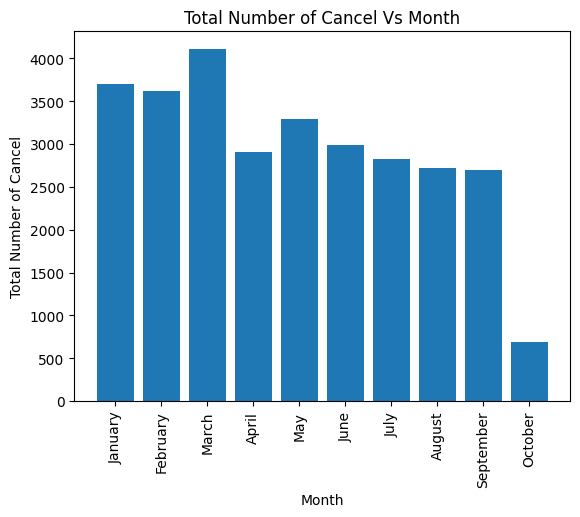

In [ ]:
plt.bar(a['Month'],a['count'])
plt.ylabel('Total Number of Cancel')
plt.xlabel('Month')
plt.title('Total Number of Cancel Vs Month')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
a = data['operator']
a = a.value_counts().reset_index()

In [ ]:
cf = a.sort_values(by='count',ascending = False)
cf.reset_index().drop('index',inplace = True,axis = 1)
cf

,operator,count
0,TM,26127
1,TIME,2032
2,CTS,701
3,TNB-ALLO,559
4,CD,126
5,SACOFA,16


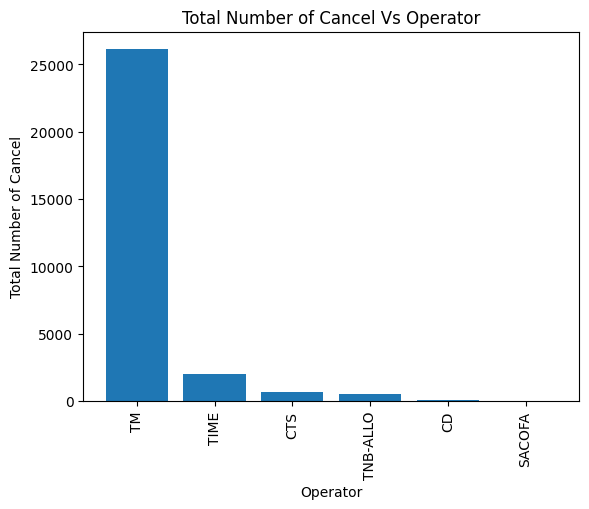

In [ ]:
plt.bar(cf['operator'],cf['count'])
plt.ylabel('Total Number of Cancel')
plt.xlabel('Operator')
plt.title('Total Number of Cancel Vs Operator')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
a = data[['operator','Aging Days']]
a

,operator,Aging Days
0,TM,2
1,CD,2
2,TM,2
3,TM,2
4,TM,2
...,...,...
32118,TM,285
32119,TM,285
32120,TIME,285
32121,TM,285


In [ ]:
bf = a.groupby(['operator']).mean()
bf = bf.sort_values(by='Aging Days',ascending = False).reset_index()
bf


,operator,Aging Days
0,SACOFA,205.875000
1,TM,155.728671
2,TIME,155.062500
3,TNB-ALLO,148.588551
4,CD,142.452381
5,CTS,110.834522


<Axes: xlabel='operator', ylabel='Aging Days'>

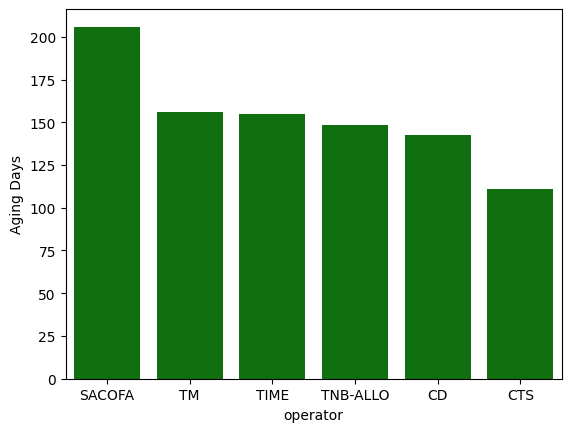

In [ ]:
sns.barplot(x='operator',y='Aging Days',data=bf, color = 'green')

In [ ]:
a = data.groupby(['subStatus']).size().reset_index()
a.columns = ['subStatus','count']
a

,subStatus,count
0,Address Not Serviceable / No Port,112
1,Address Not Serviceable / No Port (System),15
2,Blacklist,260
3,Customer Did Not Apply,1331
4,Customer changed mind,13967
5,Customer no longer reachable,8282
6,Failed Verification Check,524
7,Insufficient Info - Address,161
8,Maximum Line Count,1
9,Pending Review,106


In [ ]:
a[a['count'] == a['count'].max()]

,subStatus,count
4,Customer changed mind,13967


In [ ]:
a = data[['operator','subStatus']].copy()
a = a[a['subStatus'] == 'Customer changed mind']
b = a[['operator']].value_counts()
c = ['TM','TIME','CTS','TNB-ALLO','CD','SACOFA']

In [ ]:
b

,count
operator,
TM,12547
TIME,854
CTS,271
TNB-ALLO,248
CD,42
SACOFA,5


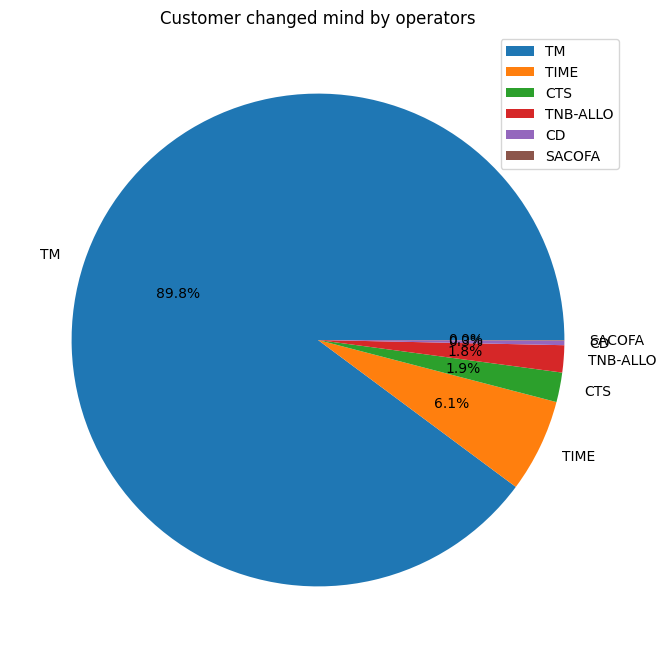

In [ ]:
plt.figure(figsize = (8,8))
plt.pie(b, labels = c,autopct = '%1.1f%%')
plt.title("Customer changed mind by operators")
plt.legend()
plt.show()

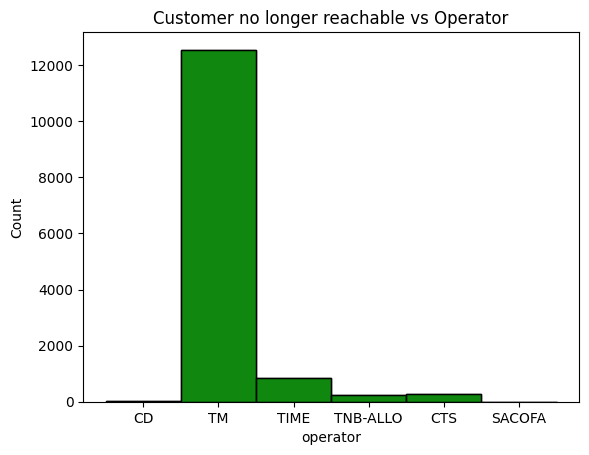

In [ ]:
sns.histplot(a['operator'], color = 'green' ).set(title='Customer changed mind vs Operator')
sns.histplot(a['operator'], color = 'green' ).set(title='Customer no longer reachable vs Operator')
plt.show()

In [ ]:
a = data['Aging Days'].value_counts().reset_index()
a

,Aging Days,count
0,226,384
1,255,330
2,227,233
3,195,190
4,229,188
...,...,...
279,3,44
280,185,43
281,117,42
282,184,38


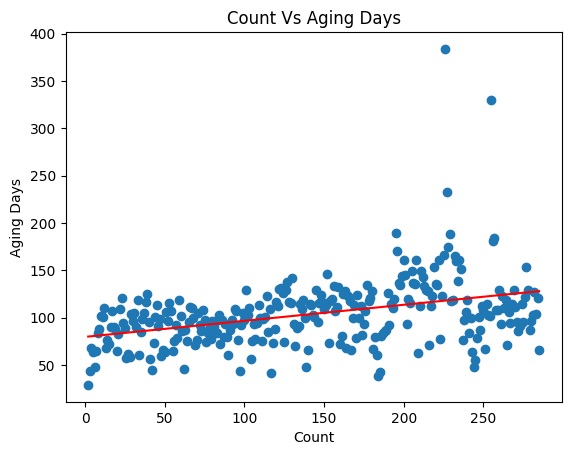

In [ ]:
plt.scatter(a['Aging Days'],a['count'])
plt.plot(np.unique(a['Aging Days']),
         np.poly1d(np.polyfit(a['Aging Days'], a['count'], 1))
         (np.unique(a['Aging Days'])), color='red')
plt.title('Count Vs Aging Days')
plt.xlabel('Count')
plt.ylabel('Aging Days')
plt.show()

In [ ]:
a.corr()

,Aging Days,count
Aging Days,1.000000,0.380483
count,0.380483,1.000000


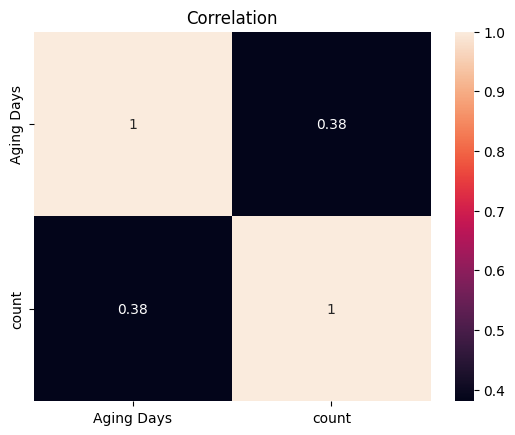

In [ ]:
# adds the title
plt.title('Correlation')

crr = sns.heatmap(a.corr(), annot=True)

#### Demand Dataset

In [ ]:
a = data2['Month']
a = a.value_counts().reset_index()
a

,Month,count
0,September,647
1,February,62
2,July,52
3,January,46
4,August,34
5,May,33
6,March,32
7,October,29
8,April,29
9,November,25


In [ ]:
a['Month'] = pd.to_datetime(a['Month'],format = '%B')
a = a.sort_values(by='Month')
a['Month'] = a['Month'].dt.strftime('%B')
a.reset_index().drop('index',inplace = True,axis = 1)
a

,Month,count
3,January,46
1,February,62
6,March,32
8,April,29
5,May,33
10,June,11
2,July,52
4,August,34
0,September,647
7,October,29


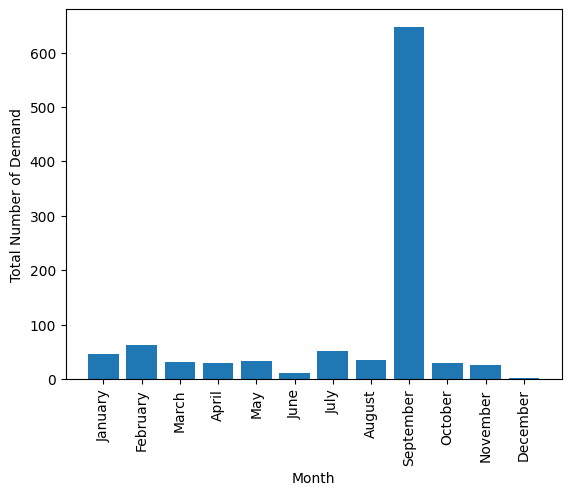

In [ ]:
plt.bar(a['Month'],a['count'])
plt.ylabel('Total Number of Demand')
plt.xlabel('Month')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
a = data2[['State']]
by_State = a.groupby(['State']).value_counts().reset_index()
by_State = by_State.sort_values(by ='count',ascending=False).reset_index().drop('index',axis = 1)
by_State

,State,count
0,Johor,152
1,Selangor,126
2,Sabah,90
3,Perak,86
4,Kedah,80
5,Sarawak,75
6,Pahang,68
7,Kelantan,58
8,Negeri Sembilan,57
9,Pulau Pinang,51


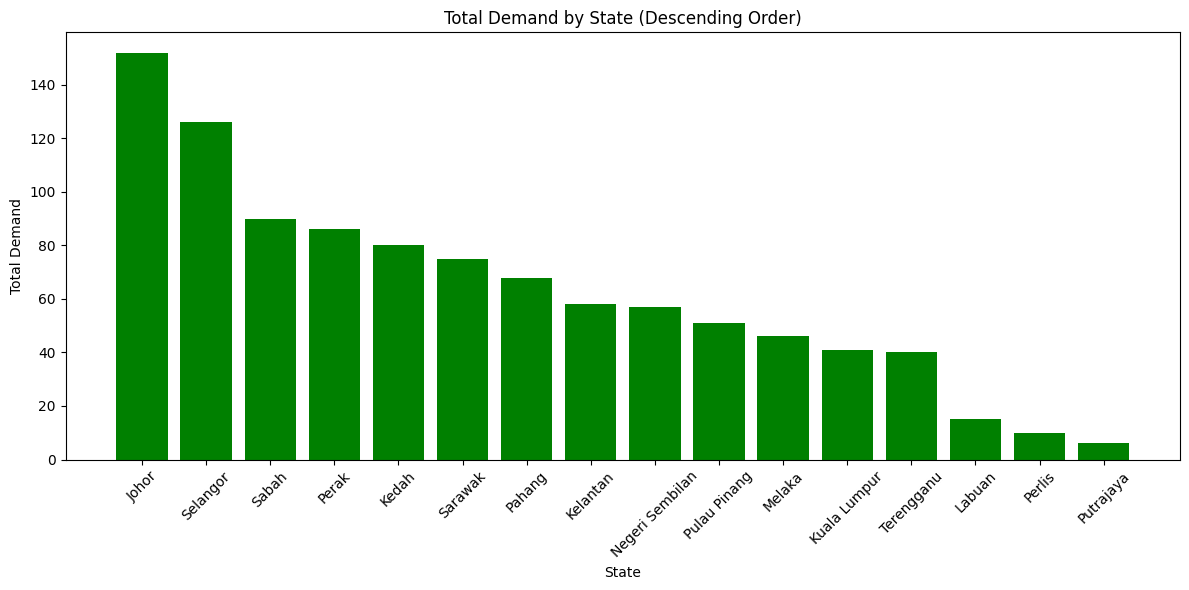

In [ ]:
# Create DataFrame
df = by_State

# Sort DataFrame by 'count' in descending order
df_sorted = df.sort_values(by='count', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(df_sorted['State'], df_sorted['count'], color='green')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Total Demand')
plt.title('Total Demand by State (Descending Order)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels

# Show the plot
plt.show()


*   Higher Demand Areas:


Selangor and Kuala Lumpur show the highest number of requests, indicating strong demand for home fibre services in these urbanized regions. This could be due to higher population density and greater connectivity needs.


* Medium Demand Areas:

Johor, Penang, and Sabah have a notable number of requests, suggesting these areas also have a significant interest in home fibre services but not as high as the top two regions.


*   Lower Demand Areas:



Regions like Putrajaya, Melaka, and Kelantan exhibit much lower demand for home fibre services. This could indicate a lower population density or less emphasis on high-speed internet access in these areas.

In [ ]:
filepath = foldername+'/ne_110m_admin_0_countries.dbf'
world = gpd.read_file(filepath)
world

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895..."


In [ ]:

my = world[world['ADMIN'] == 'Malaysia']
my

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
148,Admin-0 country,1,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((100.08576 6.46449, 100.2596 6...."


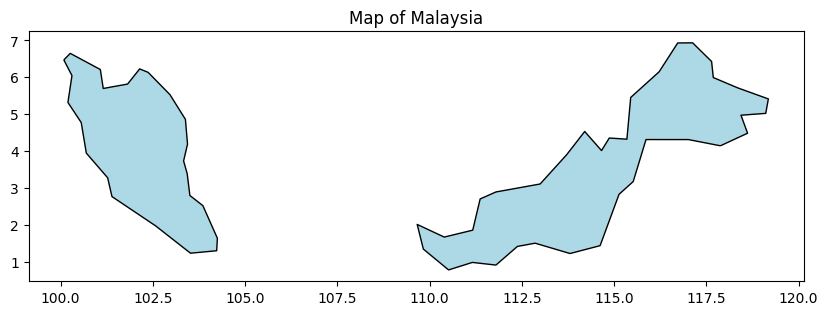

In [ ]:

fig, ax = plt.subplots(figsize=(10, 10))
my.plot(ax=ax, color='lightblue',edgecolor='black')
ax.set_title('Map of Malaysia')
plt.show()

In [ ]:
# Longitude & Latitude from https://www.latlong.net/category/states-133-14.html (slight own alteration)
state_dict = {
    'State' : ["Kedah","Perak","Perlis","Pulau Pinang","Negeri Sembilan","Kelantan","Sabah","Pahang","Selangor","Johor",'Sarawak','Terengganu', 'Kuala Lumpur','Melaka','Putrajaya','Labuan']
    ,'Longitude' : [100.569649,101.117577,100.216599,100.256238,102.172502,102.238068,116.796783,102.438057,101.524803,103.366585,113.3595,102.9896,101.6841,102.3001,101.6964,115.2308]
    ,'Latitude' : [6.155672,4.69395,6.443589,5.285153,2.731813,6.125397,5.420404,3.974341,3.509247,1.937344,2.5534,5.0936,3.1319,2.1896,2.9264,5.2831]
}

state_coord = pd.DataFrame(state_dict)

In [ ]:
state_df = by_State.merge(state_coord, on='State', how='left')
state_df

,State,count,Longitude,Latitude
0,Johor,152,103.366585,1.937344
1,Selangor,126,101.524803,3.509247
2,Sabah,90,116.796783,5.420404
3,Perak,86,101.117577,4.693950
4,Kedah,80,100.569649,6.155672
5,Sarawak,75,113.359500,2.553400
6,Pahang,68,102.438057,3.974341
7,Kelantan,58,102.238068,6.125397
8,Negeri Sembilan,57,102.172502,2.731813
9,Pulau Pinang,51,100.256238,5.285153


In [ ]:
# Create a base map
m = folium.Map(location=[4.2105, 101.9758], zoom_start=6)  # Centered on Malaysia

# Add markers for each region
for _, row in state_df.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):  # Ensure no NaN values
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"{row['State']}: {row['count']}",
            icon=folium.Icon(color='blue')
        ).add_to(m)

# Save the map to an HTML file
m.save('map_visualization.html')
m

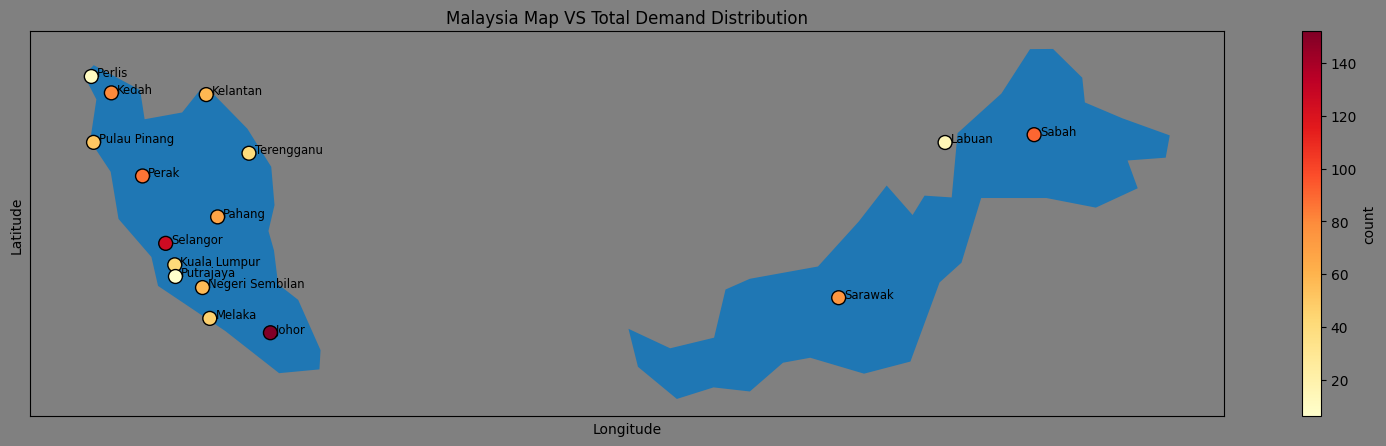

In [ ]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 5), facecolor='grey')

my.plot(ax = ax)
scatter = state_df.plot(
    x="Longitude",
    y="Latitude",
    kind="scatter",
    c='count',
    colormap="YlOrRd",
    ax=ax,
    legend=True,
    edgecolor='black',  # Optional: add edge color for better visibility
    s=100  # Adjust the size of the points
)


# Customize the plot with state labels
for index, row in state_df.iterrows():
    plt.text(row['Longitude'] + 0.1, row['Latitude'], row['State'],
             horizontalalignment='left', size='small', color='black')

# Final plot adjustments
ax.set_facecolor("grey")
plt.title('Malaysia Map VS Total Demand Distribution')
plt.xticks([])
plt.yticks([])
plt.show()

Text(0, 0.5, 'Frequency')

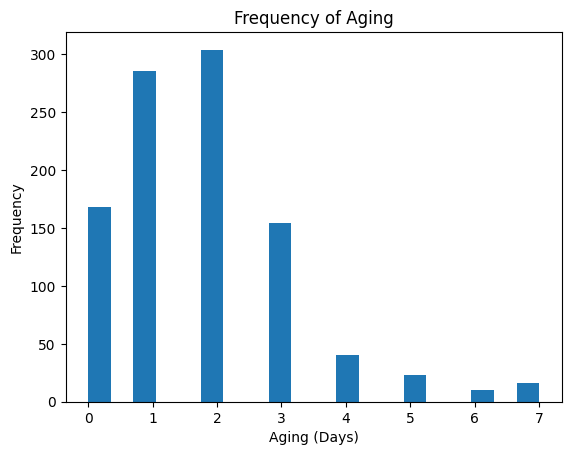

In [ ]:
data2['Aging'].plot(kind='hist', bins=20, title='Frequency of Aging')
plt.xlabel("Aging (Days)")
plt.ylabel("Frequency")
# plt.gca().spines[['top', 'right',]].set_visible(False)

# **Sentiment Analysis**

In [ ]:
pip install nltk==3.4

In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
mydata = pd.read_csv(filename2)
len(mydata)

32123

In [ ]:
mydata = mydata[['operator','cancelComments']]
mydata

,operator,cancelComments
0,TM,Relocation less than 6 months
1,CD,change to 12 mths contract
2,TM,1 lot multiple house | No separate utility
3,TM,customer request to cancel as not interested
4,TM,Relocation | Less than 6 months | Advised cust...
...,...,...
32118,TM,CANCEL
32119,TM,02/01/24 | 2nd FUP | CANCEL - Cust do not wish...
32120,TDC,1/1/24 - Address under TDC - Submitted in erro...
32121,TM,9/1: 5th fup// not serviceable//no location pr...


In [ ]:
def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence) #calling the polarity analyzer
    print("{:-<40} {}".format(sentence, str(snt)))

In [ ]:
mydata['cancelComments'] = mydata['cancelComments'].astype(str)

In [ ]:
%time #to calculate the time it takes the algorithm to compute a VADER score

i=0 #counter
compvall = [ ] #empty list to hold our computer 'compound' VADER scores

while (i<len(mydata)):

  k = analyser.polarity_scores(mydata.iloc[i]['cancelComments'])
  compvall.append(k['compound'])

  i = i+1

compvall = np.array(compvall)
len(compvall)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.54 µs


32123

In [ ]:
mydata['VADER score'] = compvall
mydata

,operator,cancelComments,VADER score
0,TM,Relocation less than 6 months,0.0000
1,CD,change to 12 mths contract,0.0000
2,TM,1 lot multiple house | No separate utility,-0.2960
3,TM,customer request to cancel as not interested,-0.5037
4,TM,Relocation | Less than 6 months | Advised cust...,-0.2500
...,...,...,...
32118,TM,CANCEL,-0.2500
32119,TM,02/01/24 | 2nd FUP | CANCEL - Cust do not wish...,-0.2711
32120,TDC,1/1/24 - Address under TDC - Submitted in erro...,-0.4019
32121,TM,9/1: 5th fup// not serviceable//no location pr...,0.0000


In [ ]:
%time #assigning score categories and logic

i=0

predicted_value = [ ] #empty series to hold our predicted values

while(i<len(mydata)):
  if ((mydata.iloc[i]['VADER score'] >= 0.05)):
    predicted_value.append('positive')
    i = i+1

  elif ((mydata.iloc[i]['VADER score'] > -0.05) & (mydata.iloc[i]['VADER score'] < 0.05)):
    predicted_value.append('neutral')
    i = i+1

  elif ((mydata.iloc[i]['VADER score'] <= -0.05)):
    predicted_value.append('negative')
    i = i+1

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [ ]:
mydata ['sentiment VADER'] = predicted_value
mydata

,operator,cancelComments,VADER score,sentiment VADER
0,TM,Relocation less than 6 months,0.0000,neutral
1,CD,change to 12 mths contract,0.0000,neutral
2,TM,1 lot multiple house | No separate utility,-0.2960,negative
3,TM,customer request to cancel as not interested,-0.5037,negative
4,TM,Relocation | Less than 6 months | Advised cust...,-0.2500,negative
...,...,...,...,...
32118,TM,CANCEL,-0.2500,negative
32119,TM,02/01/24 | 2nd FUP | CANCEL - Cust do not wish...,-0.2711,negative
32120,TDC,1/1/24 - Address under TDC - Submitted in erro...,-0.4019,negative
32121,TM,9/1: 5th fup// not serviceable//no location pr...,0.0000,neutral


In [ ]:
sentiment_spread = (mydata.groupby(by = ['sentiment VADER'])
.size().reset_index().rename(columns = {0 : "Frequency"}))

print(sentiment_spread)

  sentiment VADER  Frequency
0        negative      18684
1         neutral      10634
2        positive       2805


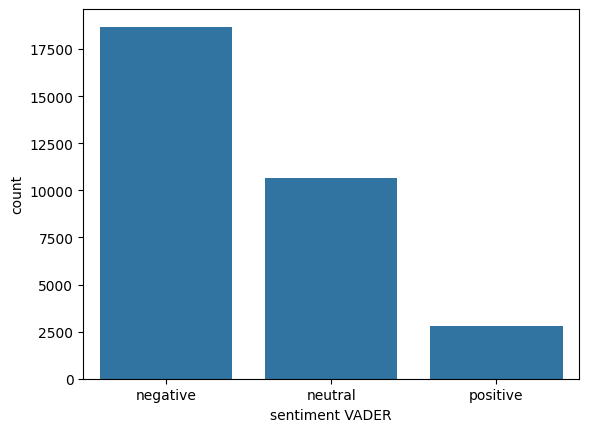

In [ ]:
sns.countplot(x = 'sentiment VADER', data = mydata, order = ['negative','neutral','positive'])
plt.show()

In [ ]:
for i in mydata[mydata['sentiment VADER'] == 'positive']['cancelComments']:
  print(i)

No longer interested
12/10/24 CANCEL|customer no more interest
Salah submit..cust nk yg free 6bulan
10/10/24 D4FUP -Address not serviceable-Pending accurate lat long-Gmaps not found-& utility-whatsapp rejected-need to ask cust to save and send message WA CelcomDigi Fibre Whatsapp number 6011-1600-3088-ARBI
11/10/24 D3FUP not serviceable TM | address not found - pending customer clear utilities/latlong/address confirmation/ customer unresponsive since day 1 - Arbi
CTS | customer request to cancel due to commitment issue
9/10/24 - TR Rejected | Pending Outstanding Balance | WA Bluetic/Uncontactable - Radin
07/10/2024 - 0195915180 XPAX POSTPAID 40 - created application under celcom - MAS
07/10/2024 - cust want to apply broadband only - not fiber - MAS
8/10/24 3rd FUP | Not serviceable TM | cust no longer respond, kindly resubmit again the order if customer still interested - amirul
8/10/24|day 3-Serviceable-whatsapp rejected-need to ask cust to save and send message WA CelcomDigi Fibre Wh

In [ ]:
mydata = mydata[['operator','sentiment VADER']]
mydata

,operator,sentiment VADER
0,TM,neutral
1,CD,neutral
2,TM,negative
3,TM,negative
4,TM,negative
...,...,...
32118,TM,negative
32119,TM,negative
32120,TDC,negative
32121,TM,neutral


In [ ]:
mydata['operator'] = mydata['operator'].apply(true_operator)
mydata

<ipython-input-395-f75c8c3bb777>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['operator'] = mydata['operator'].apply(true_operator)


,operator,sentiment VADER
0,TM,neutral
1,CD,neutral
2,TM,negative
3,TM,negative
4,TM,negative
...,...,...
32118,TM,negative
32119,TM,negative
32120,TIME,negative
32121,TM,neutral


In [ ]:
a = mydata.groupby(['operator']).value_counts().reset_index()
a

,operator,sentiment VADER,count
0,CD,negative,63
1,CD,neutral,57
2,CD,positive,6
3,CTS,negative,379
4,CTS,neutral,242
5,CTS,positive,83
6,SACOFA,negative,11
7,SACOFA,neutral,5
8,TIME,negative,1089
9,TIME,neutral,786


In [ ]:
new_value = {'operator': ['SACOFA'],
    'sentiment VADER': ['positive'],
    'count': [0]}
b = pd.DataFrame(new_value)
a = pd.concat([a,b])
a = a.reset_index().drop('index',axis = 1)
a

,operator,sentiment VADER,count
0,CD,negative,63
1,CD,neutral,57
2,CD,positive,6
3,CTS,negative,379
4,CTS,neutral,242
5,CTS,positive,83
6,SACOFA,negative,11
7,SACOFA,neutral,5
8,TIME,negative,1089
9,TIME,neutral,786


In [ ]:
operator_positive = a[a['sentiment VADER'] == 'positive']
operator_positive = operator_positive.sort_values(by='count')
operator_positive

,operator,sentiment VADER,count
17,SACOFA,positive,0
2,CD,positive,6
16,TNB-ALLO,positive,48
5,CTS,positive,83
10,TIME,positive,162
13,TM,positive,2506


In [ ]:
operator_neutral = a[a['sentiment VADER'] == 'neutral']
operator_neutral = operator_neutral.sort_values(by='count')
operator_neutral

,operator,sentiment VADER,count
7,SACOFA,neutral,5
1,CD,neutral,57
15,TNB-ALLO,neutral,219
4,CTS,neutral,242
9,TIME,neutral,786
12,TM,neutral,9325


In [ ]:
operator_negative = a[a['sentiment VADER'] == 'negative']
operator_negative = operator_negative.sort_values(by='count')
operator_negative

,operator,sentiment VADER,count
6,SACOFA,negative,11
0,CD,negative,63
14,TNB-ALLO,negative,300
3,CTS,negative,379
8,TIME,negative,1089
11,TM,negative,16841


<ipython-input-401-dd58eea4e7a7>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-401-dd58eea4e7a7>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-401-dd58eea4e7a7>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


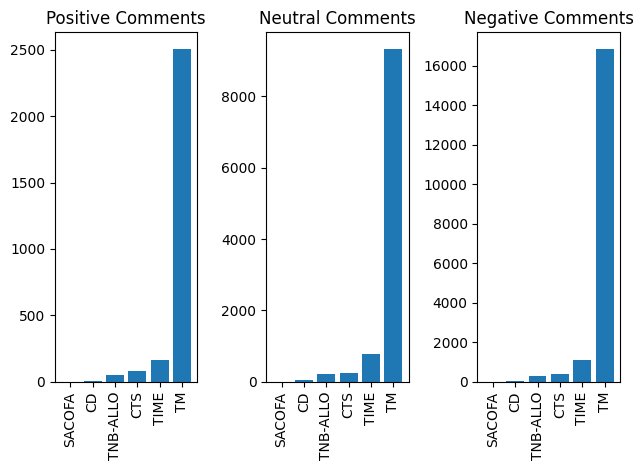

In [ ]:
fig, axs = plt.subplots(1,3)

colors = ['blue', 'orange', 'green', 'red', 'purple', 'pink']

axs[0].bar(operator_positive['operator'],operator_positive['count'])
axs[0].set_title('Positive Comments')


axs[1].bar(operator_neutral['operator'],operator_neutral['count'])
axs[1].set_title('Neutral Comments')

axs[2].bar(operator_negative['operator'],operator_negative['count'])
axs[2].set_title('Negative Comments')

for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()